In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
from sklearn.model_selection import train_test_split

In [88]:
df=pd.read_csv('~\Capestone\Capestone_DataSet\cfs-2012-pumf-csv\cfs_2012_pumf_csv.txt')

In [89]:
df.head()

,SHIPMT_ID,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
0,1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
1,2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
2,3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
3,4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
4,5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1


In [90]:
# SHIPMT_ID as index
df.set_index('SHIPMT_ID',inplace=True)

In [91]:
df.head()

,ORIG_STATE,ORIG_MA,ORIG_CFS_AREA,DEST_STATE,DEST_MA,DEST_CFS_AREA,NAICS,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,EXPORT_YN,EXPORT_CNTRY,HAZMAT,WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,,,,,,
1,25,148,25-148,25,148,25-148,333,2,35,14,2178,11,14,17,N,N,N,N,208.5
2,42,428,42-428,6,41740,06-41740,311,3,35,14,344,11,2344,2734,N,N,N,N,193.3
3,26,220,26-220,47,314,47-314,322,2,27,4,4197,5134,470,579,N,N,N,N,51.2
4,20,556,20-556,20,556,20-556,323,1,29,4,116,6,3,3,N,N,N,N,238.7
5,12,99999,12-99999,12,99999,12-99999,4235,3,33,5,388,527,124,201,N,N,N,N,398.1


In [92]:
# dropping columns ORIG_CFS_AREA, DEST_CFS_AREA, NAICS(industry can be identified from SCTG)

df.drop(['ORIG_CFS_AREA','DEST_CFS_AREA','NAICS'],axis=1,inplace=True)

In [93]:
# converting integers to string/object
df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE','DEST_MA','QUARTER', 'SCTG', 'MODE','TEMP_CNTL_YN', 'EXPORT_YN', 
    'EXPORT_CNTRY', 'HAZMAT']]=df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE','DEST_MA', 
   'QUARTER', 'SCTG', 'MODE','TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT']].astype(str)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4547661 entries, 1 to 4547661
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ORIG_STATE          object 
 1   ORIG_MA             object 
 2   DEST_STATE          object 
 3   DEST_MA             object 
 4   QUARTER             object 
 5   SCTG                object 
 6   MODE                object 
 7   SHIPMT_VALUE        int64  
 8   SHIPMT_WGHT         int64  
 9   SHIPMT_DIST_GC      int64  
 10  SHIPMT_DIST_ROUTED  int64  
 11  TEMP_CNTL_YN        object 
 12  EXPORT_YN           object 
 13  EXPORT_CNTRY        object 
 14  HAZMAT              object 
 15  WGT_FACTOR          float64
dtypes: float64(1), int64(4), object(11)
memory usage: 589.8+ MB


In [95]:
df.columns

Index(['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC',
       'SHIPMT_DIST_ROUTED', 'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY',
       'HAZMAT', 'WGT_FACTOR'],
      dtype='object')

In [96]:
# number of unique values
df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG', 'MODE', 'TEMP_CNTL_YN',
       'EXPORT_YN', 'EXPORT_CNTRY', 'HAZMAT']].nunique()

ORIG_STATE      52
ORIG_MA         72
DEST_STATE      51
DEST_MA         71
QUARTER          4
SCTG            52
MODE            21
TEMP_CNTL_YN     2
EXPORT_YN        2
EXPORT_CNTRY     4
HAZMAT           3
dtype: int64

In [97]:
# unique values in a column
df['ORIG_STATE'].unique()

array(['25', '42', '26', '20', '12', '24', '19', '6', '13', '55', '39',
       '33', '31', '54', '32', '9', '17', '37', '48', '18', '29', '49',
       '36', '27', '53', '47', '34', '5', '38', '56', '1', '51', '23',
       '45', '8', '35', '4', '21', '28', '41', '44', '2', '16', '40',
       '46', '22', '15', '30', '10', '50', '11', '0'], dtype=object)

In [98]:
# frequency of each unique value
df['ORIG_STATE'].value_counts()

6     341984
48    267822
39    221321
42    205959
36    184429
12    172342
17    170608
26    150136
37    148681
18    141060
55    137727
13    130663
27    127000
47    119696
34    114735
29    114370
51    109397
25     97933
53     93931
21     87865
1      84389
45     81883
20     79343
9      75764
19     75307
40     73907
22     72015
24     71425
41     70445
4      67307
8      65541
31     57500
49     53629
33     42784
32     39753
5      39621
28     37348
54     32003
46     31072
16     29864
15     28796
23     26783
30     25742
44     24073
38     23188
50     22781
35     22738
10     21956
56     15868
2      14675
11      2464
0         38
Name: ORIG_STATE, dtype: int64

In [99]:
df['EXPORT_YN'].value_counts()

N    4361940
Y     185721
Name: EXPORT_YN, dtype: int64

In [100]:
# dropping EXPORT_YN=='Y', inconsistency in data where EXPORT_YN=='Y', incorrect destination and distance.
df=df[df['EXPORT_YN']=='N']

In [101]:
# only 1 unique value in columns EXPORT_YN & EXPORT_YN, can drop both the columns
df[['EXPORT_CNTRY','EXPORT_YN']].nunique()

EXPORT_CNTRY    1
EXPORT_YN       1
dtype: int64

In [102]:
# dropping EXPORT_YN & EXPORT_YN
df.drop(['EXPORT_YN','EXPORT_CNTRY'],axis=1,inplace=True)

In [103]:
df.head()

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,
1,25,148,25,148,2,35,14,2178,11,14,17,N,N,208.5
2,42,428,6,41740,3,35,14,344,11,2344,2734,N,N,193.3
3,26,220,47,314,2,27,4,4197,5134,470,579,N,N,51.2
4,20,556,20,556,1,29,4,116,6,3,3,N,N,238.7
5,12,99999,12,99999,3,33,5,388,527,124,201,N,N,398.1


In [104]:
#Defining 0(ORIG_STATE, ORIG_MA, MODE), 00(SCTG) , 104(ORIG_MA,DEST_MA) and 99(SCTG) as Missing for ORIG_STATE, 
# ORIG_MA, DEST_MA, SCTG, MODE Donot include this code in report, 

def definingNA(x):
    if (x in ('0','00','99','104')):
        x = ""
    else:
        return x

In [105]:
#Defining supressed values '0','00','99' as Missing, Donot include this code in report, 
df['ORIG_STATE']=df['ORIG_STATE'].apply(definingNA)
df['ORIG_MA']=df['ORIG_MA'].apply(definingNA)
df['DEST_MA']=df['DEST_MA'].apply(definingNA)
df['SCTG']=df['SCTG'].apply(definingNA)
df['MODE']=df['MODE'].apply(definingNA)

In [106]:
df.columns

Index(['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC',
       'SHIPMT_DIST_ROUTED', 'TEMP_CNTL_YN', 'HAZMAT', 'WGT_FACTOR'],
      dtype='object')

In [107]:
# Number of missing values in categorical data
print("Count of missing values in Categorical Variables")
print(df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'TEMP_CNTL_YN', 'HAZMAT']].isna().sum())

Count of missing values in Categorical Variables
ORIG_STATE         26
ORIG_MA         28917
DEST_STATE          0
DEST_MA         18052
QUARTER             0
SCTG              569
MODE              555
TEMP_CNTL_YN        0
HAZMAT              0
dtype: int64


In [108]:
# less than 1% of data is missing, we can drop all rows with missing values
df.dropna(inplace=True)

In [109]:
# Number of missing values in categorical data
print("Count of missing values in Categorical Variables")
print(df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'TEMP_CNTL_YN', 'HAZMAT']].isna().sum())

Count of missing values in Categorical Variables
ORIG_STATE      0
ORIG_MA         0
DEST_STATE      0
DEST_MA         0
QUARTER         0
SCTG            0
MODE            0
TEMP_CNTL_YN    0
HAZMAT          0
dtype: int64


In [110]:
# SCTG column, invalid values 01-05, 06-09, 10-14, 15-19, 20-24, 25-30, 31-34, 39-99. Specific industry cannot be determined
df['SCTG'].value_counts()

35       290754
43       278448
24       273249
40       251728
34       245376
33       228073
30       203270
29       195159
32       178906
07       178757
31       172325
36       171088
26       158057
23       133448
19       132110
38       117423
08        98129
12        93398
28        93245
20        89137
39        84687
21        82696
05        60015
18        59606
27        57293
06        51943
03        51698
04        43356
17        38234
37        37877
41        36355
11        28642
02        24519
22        23863
09        16528
13        15112
15        10685
10         5577
25         4795
14         3647
01         2139
25-30       130
01-05       122
06-09       121
20-24       121
10-14       116
39-99        95
31-34        85
15-19        55
35-38        41
Name: SCTG, dtype: int64

In [111]:
df.sort_values('SCTG')['SCTG'].unique()

array(['01', '01-05', '02', '03', '04', '05', '06', '06-09', '07', '08',
       '09', '10', '10-14', '11', '12', '13', '14', '15', '15-19', '17',
       '18', '19', '20', '20-24', '21', '22', '23', '24', '25', '25-30',
       '26', '27', '28', '29', '30', '31', '31-34', '32', '33', '34',
       '35', '35-38', '36', '37', '38', '39', '39-99', '40', '41', '43'],
      dtype=object)

In [112]:
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
# https://www150.statcan.gc.ca/n1/pub/50-503-x/50-503-x2018001-eng.htm

def SCTG_IND(SCTG):
    if SCTG in ('01', '01-05', '02', '03', '04', '05'):
        return 'AGRI'
    elif SCTG in ('06', '06-09', '07','08', '09'):
        return 'FOOD'
    elif SCTG in ('10', '10-14', '11', '12', '13', '14'): 
        return 'MNRLS'
    elif SCTG in ('15', '15-19','17', '18', '19'):
        return 'FUEL'
    elif SCTG in ('20', '20-24', '21', '22', '23', '24'):
        return 'PLCHM'
    elif SCTG in ('25','25-30', '26', '27', '28', '29'):
        return 'FRPAP'
    elif SCTG in ('31', '31-34', '32', '33'):
        return 'BMETL'
    elif SCTG in ('35-38', '36', '37', '38'):
        return 'TRANS'
    elif SCTG =='41':
        return 'WASTE'
    elif SCTG in ('30','34','35','39','39-99'):
        return 'OTHMF'
    elif SCTG in ('40','43'):
        return 'MISC'

In [113]:
# converting SCTG codes to INDUSTRIES, refering STATS CAN website
df['SCTG']=df['SCTG'].apply(SCTG_IND)

In [114]:
df['SCTG'].unique()

array(['OTHMF', 'FRPAP', 'BMETL', 'MISC', 'PLCHM', 'AGRI', 'TRANS',
       'FUEL', 'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [115]:
# dropping SCTG=='MISC' due to inconsistency in data, 'miscellaneous' SCTG values will affect the SHIPMENT VALUES and WEIGHT 
df=df[df['SCTG']!='MISC']

In [116]:
df['SCTG'].unique()

array(['OTHMF', 'FRPAP', 'BMETL', 'PLCHM', 'AGRI', 'TRANS', 'FUEL',
       'MNRLS', 'FOOD', 'WASTE'], dtype=object)

In [117]:
df.head()

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,TEMP_CNTL_YN,HAZMAT,WGT_FACTOR
SHIPMT_ID,,,,,,,,,,,,,,
1,25,148,25,148,2,OTHMF,14,2178,11,14,17,N,N,208.5
2,42,428,6,41740,3,OTHMF,14,344,11,2344,2734,N,N,193.3
3,26,220,47,314,2,FRPAP,4,4197,5134,470,579,N,N,51.2
4,20,556,20,556,1,FRPAP,4,116,6,3,3,N,N,238.7
5,12,99999,12,99999,3,BMETL,5,388,527,124,201,N,N,398.1


In [118]:
# creating dummy variables for Categorical variables

ORIG_STATE_DUMMY=pd.get_dummies(data=df['ORIG_STATE'],drop_first=True)
ORIG_MA_DUMMY=pd.get_dummies(data=df['ORIG_MA'],drop_first=True)
DEST_STATE_DUMMY=pd.get_dummies(data=df['DEST_STATE'],drop_first=True)
DEST_MA_DUMMY=pd.get_dummies(data=df['ORIG_MA'],drop_first=True)
QUARTER_DUMMY=pd.get_dummies(data=df['QUARTER'],drop_first=True)
SCTG_DUMMY=pd.get_dummies(data=df['SCTG'],drop_first=True)
MODE_DUMMY=pd.get_dummies(data=df['MODE'],drop_first=True)
TEMP_CNTL_YN_DUMMY=pd.get_dummies(data=df['TEMP_CNTL_YN'],drop_first=True)
HAZMAT_DUMMY=pd.get_dummies(data=df['HAZMAT'],drop_first=True)

In [119]:
# renaming dummy variables as per the categorical variables

ORIG_STATE_DUMMY.columns = ['ORIG_STATE_DUMMY_10','ORIG_STATE_DUMMY_11','ORIG_STATE_DUMMY_12','ORIG_STATE_DUMMY_13','ORIG_STATE_DUMMY_15','ORIG_STATE_DUMMY_16','ORIG_STATE_DUMMY_17',
'ORIG_STATE_DUMMY_18','ORIG_STATE_DUMMY_19','ORIG_STATE_DUMMY_2','ORIG_STATE_DUMMY_20','ORIG_STATE_DUMMY_21','ORIG_STATE_DUMMY_22','ORIG_STATE_DUMMY_23',
'ORIG_STATE_DUMMY_24','ORIG_STATE_DUMMY_25','ORIG_STATE_DUMMY_26','ORIG_STATE_DUMMY_27','ORIG_STATE_DUMMY_28','ORIG_STATE_DUMMY_29','ORIG_STATE_DUMMY_30',
'ORIG_STATE_DUMMY_31','ORIG_STATE_DUMMY_32','ORIG_STATE_DUMMY_33','ORIG_STATE_DUMMY_34','ORIG_STATE_DUMMY_35','ORIG_STATE_DUMMY_36','ORIG_STATE_DUMMY_37',
'ORIG_STATE_DUMMY_38','ORIG_STATE_DUMMY_39','ORIG_STATE_DUMMY_4','ORIG_STATE_DUMMY_40','ORIG_STATE_DUMMY_41','ORIG_STATE_DUMMY_42','ORIG_STATE_DUMMY_44',
'ORIG_STATE_DUMMY_45','ORIG_STATE_DUMMY_46','ORIG_STATE_DUMMY_47','ORIG_STATE_DUMMY_48','ORIG_STATE_DUMMY_49','ORIG_STATE_DUMMY_5','ORIG_STATE_DUMMY_50',
'ORIG_STATE_DUMMY_51','ORIG_STATE_DUMMY_53','ORIG_STATE_DUMMY_54','ORIG_STATE_DUMMY_55','ORIG_STATE_DUMMY_56','ORIG_STATE_DUMMY_6','ORIG_STATE_DUMMY_8',
'ORIG_STATE_DUMMY_9']

ORIG_MA_DUMMY.columns=['ORIG_MA_12420','ORIG_MA_12580','ORIG_MA_12940','ORIG_MA_13140','ORIG_MA_142','ORIG_MA_148','ORIG_MA_160','ORIG_MA_16700','ORIG_MA_172',
'ORIG_MA_176','ORIG_MA_178','ORIG_MA_184','ORIG_MA_198','ORIG_MA_204','ORIG_MA_206','ORIG_MA_212','ORIG_MA_216','ORIG_MA_220','ORIG_MA_238',
'ORIG_MA_25540','ORIG_MA_258','ORIG_MA_260','ORIG_MA_266','ORIG_MA_268','ORIG_MA_273','ORIG_MA_288','ORIG_MA_29340','ORIG_MA_294','ORIG_MA_29700',
'ORIG_MA_300','ORIG_MA_312','ORIG_MA_314','ORIG_MA_332','ORIG_MA_348','ORIG_MA_350','ORIG_MA_368','ORIG_MA_370','ORIG_MA_376','ORIG_MA_378',
'ORIG_MA_380','ORIG_MA_38060','ORIG_MA_400','ORIG_MA_40060','ORIG_MA_406','ORIG_MA_408','ORIG_MA_416','ORIG_MA_41700','ORIG_MA_41740','ORIG_MA_420',
'ORIG_MA_422','ORIG_MA_428','ORIG_MA_430','ORIG_MA_440','ORIG_MA_450','ORIG_MA_45300','ORIG_MA_464','ORIG_MA_46520','ORIG_MA_472','ORIG_MA_476',
'ORIG_MA_47900','ORIG_MA_482','ORIG_MA_488','ORIG_MA_496','ORIG_MA_500','ORIG_MA_536','ORIG_MA_538','ORIG_MA_545',
               'ORIG_MA_556','ORIG_MA_99999']

DEST_STATE_DUMMY.coumns=['DEST_STATE_DUMMY_10','DEST_STATE_DUMMY_11','DEST_STATE_DUMMY_12','DEST_STATE_DUMMY_13','DEST_STATE_DUMMY_15','DEST_STATE_DUMMY_16','DEST_STATE_DUMMY_17',
'DEST_STATE_DUMMY_18','DEST_STATE_DUMMY_19','DEST_STATE_DUMMY_2','DEST_STATE_DUMMY_20','DEST_STATE_DUMMY_21','DEST_STATE_DUMMY_22','DEST_STATE_DUMMY_23',
'DEST_STATE_DUMMY_24','DEST_STATE_DUMMY_25','DEST_STATE_DUMMY_26','DEST_STATE_DUMMY_27','DEST_STATE_DUMMY_28','DEST_STATE_DUMMY_29','DEST_STATE_DUMMY_30',
'DEST_STATE_DUMMY_31','DEST_STATE_DUMMY_32','DEST_STATE_DUMMY_33','DEST_STATE_DUMMY_34','DEST_STATE_DUMMY_35','DEST_STATE_DUMMY_36','DEST_STATE_DUMMY_37',
'DEST_STATE_DUMMY_38','DEST_STATE_DUMMY_39','DEST_STATE_DUMMY_4','DEST_STATE_DUMMY_40','DEST_STATE_DUMMY_41','DEST_STATE_DUMMY_42','DEST_STATE_DUMMY_44',
'DEST_STATE_DUMMY_45','DEST_STATE_DUMMY_46','DEST_STATE_DUMMY_47','DEST_STATE_DUMMY_48','DEST_STATE_DUMMY_49','DEST_STATE_DUMMY_5','DEST_STATE_DUMMY_50',
'DEST_STATE_DUMMY_51','DEST_STATE_DUMMY_53','DEST_STATE_DUMMY_54','DEST_STATE_DUMMY_55','DEST_STATE_DUMMY_56','DEST_STATE_DUMMY_6','DEST_STATE_DUMMY_8',
'DEST_STATE_DUMMY_9']

DEST_MA_DUMMY.columns=['DEST_MA_12420','DEST_MA_12580','DEST_MA_12940','DEST_MA_13140','DEST_MA_142','DEST_MA_148','DEST_MA_160','DEST_MA_16700','DEST_MA_172',
'DEST_MA_176','DEST_MA_178','DEST_MA_184','DEST_MA_198','DEST_MA_204','DEST_MA_206','DEST_MA_212','DEST_MA_216','DEST_MA_220','DEST_MA_238',
'DEST_MA_25540','DEST_MA_258','DEST_MA_260','DEST_MA_266','DEST_MA_268','DEST_MA_273','DEST_MA_288','DEST_MA_29340','DEST_MA_294','DEST_MA_29700',
'DEST_MA_300','DEST_MA_312','DEST_MA_314','DEST_MA_332','DEST_MA_348','DEST_MA_350','DEST_MA_368','DEST_MA_370','DEST_MA_376','DEST_MA_378',
'DEST_MA_380','DEST_MA_38060','DEST_MA_400','DEST_MA_40060','DEST_MA_406','DEST_MA_408','DEST_MA_416','DEST_MA_41700','DEST_MA_41740','DEST_MA_420',
'DEST_MA_422','DEST_MA_428','DEST_MA_430','DEST_MA_440','DEST_MA_450','DEST_MA_45300','DEST_MA_464','DEST_MA_46520','DEST_MA_472','DEST_MA_476',
'DEST_MA_47900','DEST_MA_482','DEST_MA_488','DEST_MA_496','DEST_MA_500','DEST_MA_536','DEST_MA_538','DEST_MA_545',
                'DEST_MA_556','DEST_MA_99999']

QUARTER_DUMMY.columns=['Quarter_2','Quarter_3','Quarter_4']

SCTG_DUMMY.columns=['SCTG_BMETL', 'SCTG_FOOD', 'SCTG_FRPAP', 'SCTG_FUEL', 'SCTG_MNRLS', 'SCTG_OTHMF', 'SCTG_PLCHM', 'SCTG_TRANS',
       'SCTG_WASTE']

MODE_DUMMY.columns=['MODE_101', 'MODE_11', 'MODE_12', 'MODE_13', 'MODE_14', 'MODE_15',
       'MODE_16', 'MODE_17', 'MODE_19', 'MODE_2', 'MODE_20', 'MODE_3',
       'MODE_4', 'MODE_5', 'MODE_6', 'MODE_7', 'MODE_8', 'MODE_9']

TEMP_CNTL_YN_DUMMY.columns=['TEMP_CNTL_YN_DUMMY_Y']

HAZMAT_DUMMY.columns=['HAZMAT_DUMMY_N','HAZMAT_DUMMY_P']

C:\Users\prans\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [120]:
# concatinating dummy variables with original dataset

df=pd.concat([df,ORIG_STATE_DUMMY,ORIG_MA_DUMMY,DEST_STATE_DUMMY,DEST_MA_DUMMY,QUARTER_DUMMY,SCTG_DUMMY,MODE_DUMMY,TEMP_CNTL_YN_DUMMY,HAZMAT_DUMMY],axis=1)

In [121]:
df.columns

Index(['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'QUARTER', 'SCTG',
       'MODE', 'SHIPMT_VALUE', 'SHIPMT_WGHT', 'SHIPMT_DIST_GC',
       ...
       'MODE_3', 'MODE_4', 'MODE_5', 'MODE_6', 'MODE_7', 'MODE_8', 'MODE_9',
       'TEMP_CNTL_YN_DUMMY_Y', 'HAZMAT_DUMMY_N', 'HAZMAT_DUMMY_P'],
      dtype='object', length=285)

In [122]:
df.head()

,ORIG_STATE,ORIG_MA,DEST_STATE,DEST_MA,QUARTER,SCTG,MODE,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,...,MODE_3,MODE_4,MODE_5,MODE_6,MODE_7,MODE_8,MODE_9,TEMP_CNTL_YN_DUMMY_Y,HAZMAT_DUMMY_N,HAZMAT_DUMMY_P
SHIPMT_ID,,,,,,,,,,,,,,,,,,,,,
1,25,148,25,148,2,OTHMF,14,2178,11,14,...,0,0,0,0,0,0,0,0,1,0
2,42,428,6,41740,3,OTHMF,14,344,11,2344,...,0,0,0,0,0,0,0,0,1,0
3,26,220,47,314,2,FRPAP,4,4197,5134,470,...,0,1,0,0,0,0,0,0,1,0
4,20,556,20,556,1,FRPAP,4,116,6,3,...,0,1,0,0,0,0,0,0,1,0
5,12,99999,12,99999,3,BMETL,5,388,527,124,...,0,0,1,0,0,0,0,0,1,0


In [124]:
# dropping original Categorical Variables

df.drop(['ORIG_STATE','ORIG_MA','DEST_STATE','DEST_MA','QUARTER','SCTG','MODE','TEMP_CNTL_YN','HAZMAT'],axis=1,inplace=True)

In [125]:
df.head()

,SHIPMT_VALUE,SHIPMT_WGHT,SHIPMT_DIST_GC,SHIPMT_DIST_ROUTED,WGT_FACTOR,ORIG_STATE_DUMMY_10,ORIG_STATE_DUMMY_11,ORIG_STATE_DUMMY_12,ORIG_STATE_DUMMY_13,ORIG_STATE_DUMMY_15,...,MODE_3,MODE_4,MODE_5,MODE_6,MODE_7,MODE_8,MODE_9,TEMP_CNTL_YN_DUMMY_Y,HAZMAT_DUMMY_N,HAZMAT_DUMMY_P
SHIPMT_ID,,,,,,,,,,,,,,,,,,,,,
1,2178,11,14,17,208.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,344,11,2344,2734,193.3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,4197,5134,470,579,51.2,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,116,6,3,3,238.7,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
5,388,527,124,201,398.1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [73]:
# skewiness for Quantitative data
# skew(df[['SHIPMT_VALUE','SHIPMT_WGHT','SHIPMT_DIST_GC','SHIPMT_DIST_ROUTED','WGT_FACTOR']].dropna())

array([504.90979497,  77.79670685,   2.18399473,   2.0514966 ,
        36.77431366])

In [74]:
# kurtosis for Quantitative data
# kurtosis(df[['SHIPMT_VALUE','SHIPMT_WGHT','SHIPMT_DIST_GC','SHIPMT_DIST_ROUTED','WGT_FACTOR']].dropna())

array([2.86972871e+05, 1.27522158e+04, 5.24433268e+00, 4.18256523e+00,
       1.70231736e+03])

In [75]:
# Shapiro Wilk Normality  test
# p_value=stats.shapiro(df['SHIPMT_WGHT'].dropna())[1]
# if (p_value<=0.05):
#     print('Null Hypothesis of normality is rejected')
# else:
#         print('Null Hypothesis of normality is accepted')

Null Hypothesis of normality is rejected


C:\Users\prans\anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [76]:
# Shapiro Wilk Normality  test
# p_value=stats.shapiro(df['SHIPMT_VALUE'].dropna())[1]
# if (p_value<=0.05):
#     print('Null Hypothesis of normality is rejected')
# else:
#         print('Null Hypothesis of normality is accepted')

Null Hypothesis of normality is rejected


In [ ]:
# correlation matrix
# df.corr()

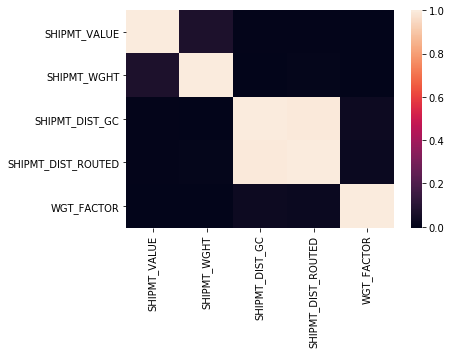

In [78]:
# # correlation matrix heat map
# sns.heatmap(df.corr())

In [79]:
# train test split
# df_input_train, df_input_test, df_target_train, df_target_test = train_test_split(df[['ORIG_STATE', 'ORIG_MA', 'DEST_STATE', 'DEST_MA', 'NAICS', 'QUARTER',
#        'SCTG', 'MODE','SHIPMT_WGHT', 'SHIPMT_DIST_GC',
#        'SHIPMT_DIST_ROUTED', 'TEMP_CNTL_YN', 'EXPORT_YN', 'EXPORT_CNTRY',
#        'HAZMAT', 'WGT_FACTOR']], df[['SHIPMT_VALUE']], test_size=0.2, random_state=101)